# Tarea 2

_Instrucciones_

- El formato de entrega del control es "ApellidoNombre.ipynb"
- Puede usar cualquier herramienta que estime conveniente para completar este control
- Todos los gráficos deben llevar un título representativo y deben estar bien formateados
    - Gráficos sin texto o con texto ilegible se corregirán con puntaje mínimo
- Comente su código: explique **brevemente** qué es lo que hace cada bloque de código o función
- Se descuenta por ortografía y redacción

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: Diabetes

Información del dataset _diabetes_:

```
Pregnancies: Número de embarazos
Glucose: Nivel de Glucosa en la sangre
BloodPressure: Presión de la sangre
SkinThickness: Espesor de la piel
Insulin: Insulina en la sangre
BMI: Índice de masa corporal
Age: Edad del paciente
```



### Preprocesamiento

Abrir los archivos _diabetesOriginal.csv_ y _diabetesDf.csv_. Trabajando sobre el segundo:

1. Obtener información del dataframe. Arreglar los registros con tipo `string` en vez del numérico correspondiente.

2. Revisar si existen registros duplicados y quítelos. Revise si existen valores atípicos, graficando boxplots para visualizarlos, y elimine el registro correspondiente.

3. Para cada método de procesamiento de nulos cree un dataframe distinto:
    - Elimine los registros con valores nulos
    - Rellene con método "ffill"
    - Rellene con la media de la columna
    - Rellene con la mediana de la columna
    - Rellene con valores aleatorios (`random_state=4`) en el intervalo:
$[\overline{x}-\sigma, \overline{x}+\sigma]$

4. Calcule estadísticos básicos para cada uno de los dataframes obtenidos y compare los resultados con el dataframe original. ¿Qué método es el que más se acerca al original?

In [3]:
df_diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tarea 2/diabetesDf.csv')

In [4]:
 df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     774 non-null    int64  
 1   Pregnancies    693 non-null    float64
 2   Glucose        689 non-null    object 
 3   BloodPressure  690 non-null    float64
 4   SkinThickness  711 non-null    float64
 5   Insulin        709 non-null    object 
 6   BMI            683 non-null    float64
 7   Age            705 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 48.5+ KB


In [5]:

# Crear una copia del dataframe original
df_d = df_diabetes.copy()

# Recorrer las columnas del dataframe
for column in df_d.columns:
    # Convertir los valores de la columna a tipo numérico
    df_d[column] = pd.to_numeric(df_d[column], errors='coerce')

<Axes: >

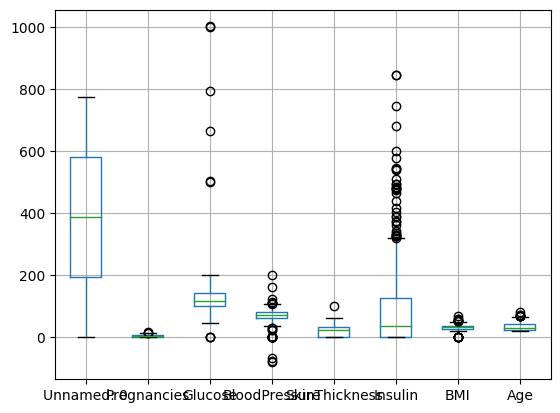

In [6]:
df_d.drop_duplicates(inplace=True)
df_d.boxplot()


In [11]:
for columna in df_d.columns:
    Q1 = df_d[columna].quantile(0.25)
    Q3 = df_d[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_d[(df_d[columna] < limite_inferior) | (df_d[columna] > limite_superior)]
    df = df_d.drop(outliers.index)

# df ahora contiene el DataFrame sin outliers en las columnas especificadas

<Axes: >

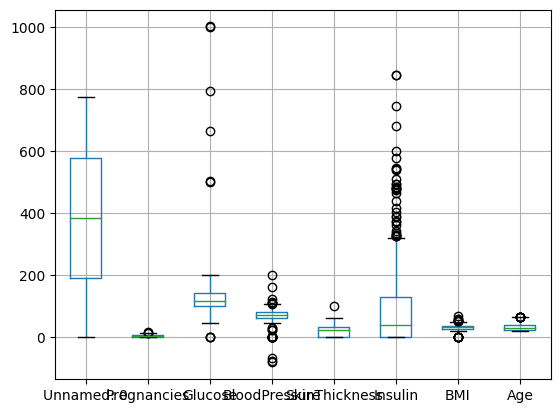

In [12]:

df.boxplot()

### Análisis
Dadas las siguientes condiciones:

- Personas con `BloodPressure` > 75
- Personas con sobrepeso (`BMI` > 25)
- Personas con obesidad (`BMI` > 30)
- Personas con `Glucose` > 125

Determinar:

1. Cantidad de ocurrencias de cada una
2. Cantidad de personas con `BloodPressure` > 75 y obesidad
3. Cantidad de personas con `Glucose` > 125 y obesidad
4. Generar un dataframe con todas las personas que no cumplan ninguna de las condiciones




### Gráficos
En cada pregunta, interprete cada uno de los gráficos de la manera más completa posible.

1. Genere subgráficos boxplot para cada variable numérica. Formatee los gráficos agregando el valor de la media y la mediana en la figura.

2. Genere subgráficos de histograma horizontal y swarmplot para las columnas `Glucose`, `BMI` y `Age`.

3. Genere un joinplot para comparar las variables `Glucose` y `BMI`.

4. Calcule la correlación de las variables y genere un heatmap. Interprete los resultados obtenidos.

## Parte 2: Accidentes en minería

Información del dataset _historico-accidentes.csv_:


```
N° REGIÓN
REGIÓN
GÉNERO
TIPO: tipo de trabajador (contratista o mandante)
ACCIDENTE FATAL: accidente que provocó la muerte
ACCIDENTE CON TIEMPO PERDIDO: accidente que provocó tiempo de reposo
TOTAL: total de accidentes
PERSONAS: personas que trabajan en el TIPO
HORAS/PERSONAS: corresponde a 1 hora de trabajo ininterrumpido de un trabajador medio
DIAS PERDIDOS
TASA DE FRECUENCIA: número de accidentes por millón de HH
TASA DE GRAVEDAD: número de días de ausencia por millón de HH
TASA DE FATALIDAD: número de fallecidos por millón de HH
AÑO
```



1. Abrir archivo _historico-accidentes.csv_, eliminar las columnas `N° REGIÓN`, `TIPO`, `PERSONAS`, `HORAS/PERSONAS`, `TASA DE FRECUENCIA`, `TASA DE GRAVEDAD` y `TASA DE FATALIDAD`.

2. Preprocesar los datos. Trabajar los valores nulos con el método que mejor resultados entregó el preprocesamiento de la Parte 1.

3. Calcular estadísticos básicos sin usar `pd.describe()` (media, moda, mediana, desviación estándar, cuartiles, máximo y mínimo).

4. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por año. Interpretar los gráficos.

5. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por género. Interpretar los gráficos.

6. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por región. Interpretar los gráficos.

7. Crear subgráficos boxplot para la columna `DIAS PERDIDOS`. Elimine los valores atípicos y grafique nuevamente.